In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate

In [2]:
from toy_tools import *

In [22]:
def deconv(m, r, npoints):
    m_fft = np.fft.fft(m, n=npoints)
    r_fft = np.fft.fft(r, n=npoints)
    s_fft = m_fft / r_fft
    #s_fft[npoints//2-10:npoints//2+10] = 0
    return np.fft.ifft(m_fft / r_fft)

In [64]:
def run(pos=8700, useacc=True, extrapolate=False):
    q = 30_600
    delay = 15
    thres = 6_000
    roi = 5*delay
    npoints = 10_000
    
    unit_fr = load_fr_ctr('response_44_v2a_100ns.npy')
    q0 = q*np.ones(1)
    # from toy_translation.ipynb
    r = 20
    sigma = 2
    q1 = q_gaus(q=q, r=21, sigma=sigma)
    fr0 = fr_record(q0, pos, unit_fr)
    fr1 = fr_record(q1, pos, unit_fr)

    r0 = readout(fr0, thres=thres, delay=delay)
    r1 = readout(fr1, thres=thres, delay=delay)

    r0_smooth = smooth_wf(wf=r0, thres=thres, roi=roi, delay=delay, npoints=npoints, extrapolate=extrapolate)
    r1_smooth = smooth_wf(wf=r1, thres=thres, roi=roi, delay=delay, npoints=npoints, extrapolate=extrapolate)

    if useacc:
        r0_acc = np.add.accumulate(r0_smooth)
        r1_acc = np.add.accumulate(r1_smooth)
        unit_fr_acc = np.add.accumulate(unit_fr)
        q0_ifft = deconv(r0_acc, unit_fr_acc, npoints)
        q1_ifft = deconv(r1_acc, unit_fr_acc, npoints)
    else:
        q0_ifft = deconv(r0_smooth, unit_fr, npoints)
        q1_ifft = deconv(r1_smooth, unit_fr, npoints)


        ts = np.arange(0, npoints, 1, dtype=np.int_)

    ts0 = np.arange(0, npoints, step=1, dtype=int)
    ts1 = np.arange(0, npoints, step=1, dtype=int)
    aux_t = npoints - len(unit_fr) - pos
    ts_q0 = [aux_t]
    ts_q1 = np.arange(0+aux_t, len(q1)+aux_t, 1, dtype=np.int_)
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5*2, 3))
    ax0.bar(x=ts_q0, height=q0, width=1, label='qDelta')
    ax0.plot(ts0, q0_ifft, linestyle='dotted', label='deconv.', c='orange')
    ax1.bar(x=ts_q0, height=q0, width=1, label='qDelta')
    ax1.plot(ts0, q0_ifft, linestyle='dotted', label='deconv.', c='orange')
    ax0.legend()
    ax1.legend()
    ax1.set_xlim(-80+aux_t, 80+aux_t)
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5*2, 3))

    ax0.plot(ts_q1, q1, linestyle='--', label='qGaus')
    ax0.plot(ts1, q1_ifft, linestyle='dotted', label='deconv.')
    ax1.plot(ts_q1, q1, linestyle='--', label='qGaus')
    ax1.plot(ts1, q1_ifft, linestyle='dotted', label='deconv.')
    ax0.legend()
    ax1.legend()
    ax1.set_xlim(-80+aux_t, 80+aux_t)

    print(np.sum(q1))
    print(np.sum(q1_ifft))

    return q0_ifft, q1_ifft

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
17.0
[1179. 1196.]
[[1104, 1179, 6000], [1179, 1194, 12770.612597685362], [1194, 1196, 6000], [1196, 1211, 3566.283843871779]]
18.0
[1189. 1207.]
[[1114, 1189, 6000], [1189, 1204, 13428.274903172776], [1204, 1207, 6000], [1207, 1222, 2952.5563540967305]]
30599.999233925155
(28380.83125726952+4.0389678347315804e-27j)


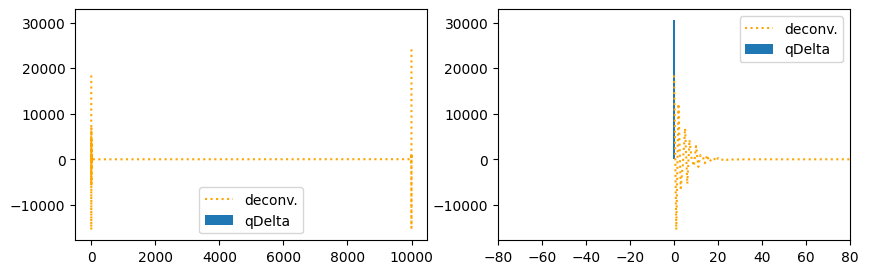

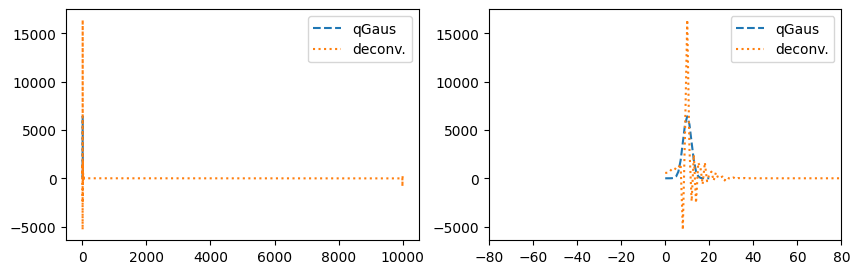

In [61]:
# plt.close('all')
run(8700, False, True)

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
17.0
[1179. 1196.]
[[1104, 1179, 6000], [1179, 1194, 12770.612597685362], [1194, 1196, 6000], [1196, 1211, 3566.283843871779]]
18.0
[1189. 1207.]
[[1114, 1189, 6000], [1189, 1204, 13428.274903172776], [1204, 1207, 6000], [1207, 1222, 2952.5563540967305]]
30599.999233925155
(28380.831257269503-1.231885189593132e-26j)


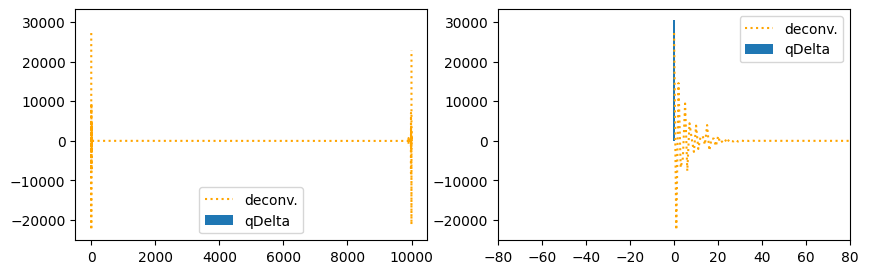

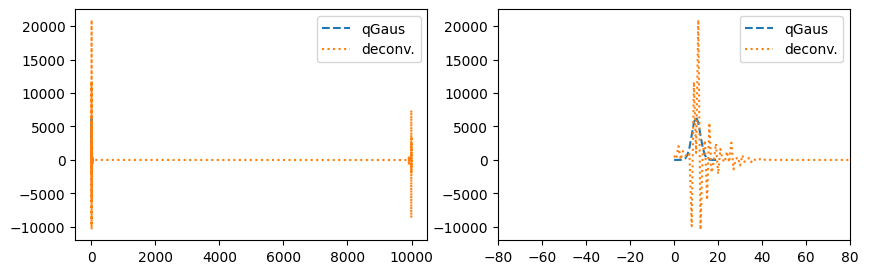

In [60]:
run(8700, False, False)

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
17.0
[4879. 4896.]
[[4804, 4879, 6000], [4879, 4894, 12770.612597685362], [4894, 4896, 6000], [4896, 4911, 3566.283843871779]]
18.0
[4889. 4907.]
[[4814, 4889, 6000], [4889, 4904, 13428.27490317278], [4904, 4907, 6000], [4907, 4922, 2952.5563540967305]]
30599.999233925155
(28380.83125726952+1.2116903504194741e-27j)


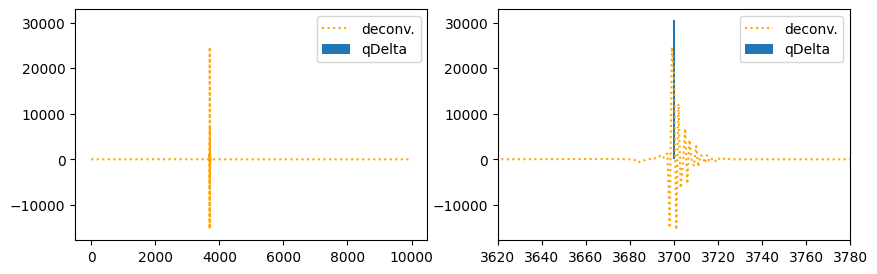

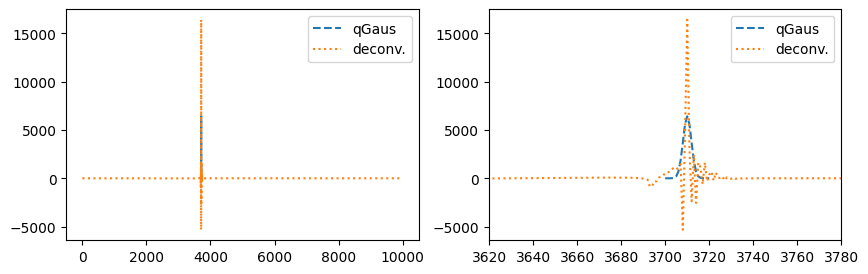

In [65]:
_, q1_ifft = run(5000, False, True)

In [73]:
print(np.sum(q1_ifft[3680:3780]))
print(np.sum(q1_ifft))
print(np.sum(q1_ifft[:3680]))

(27031.006740184726+4.3144998244180695e-13j)
(28380.83125726952+1.2116903504194741e-27j)
(1349.8228112889587-4.508021024846424e-13j)


(730.0, 750.0)

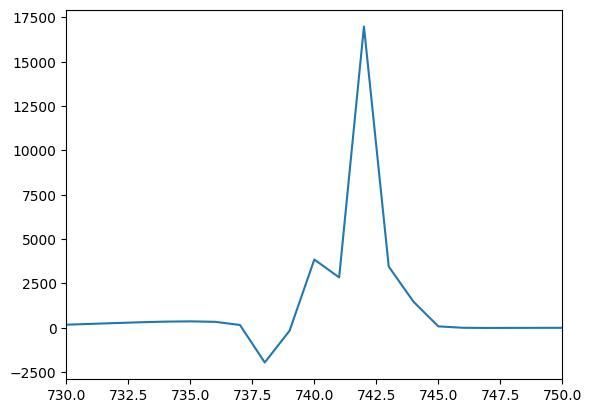

In [79]:
plt.close('all')
plt.plot(np.sum(q1_ifft.reshape(10000//5, 5), axis=1))
plt.xlim(730, 750)